In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
%matplotlib inline

# An example: Does exercise reduce probability of developing disease?
Let's first generate data. We assume that the real probability of getting diseased is determined by **age** and **hours exercised**.

In [39]:
''' for people younger than 50 '''

n_sample = 100 # 100 patients
np.random.seed(1234)

#in this case, we set age as the confounding factor
ages = np.random.randint(20, 50, n_sample) # ages: 20-49

# varibale of interest
exer_hours = np.random.randint(1, 5, n_sample) + np.random.randn(n_sample) 

# then, we can generate the propabiliy of disease as follows:
p_disease = 12 + 0.5 * ages + -2.1 * exer_hours + np.random.randn(n_sample) * 2 
under_50 = pd.DataFrame({'age': ages, 'Hours Exercised': exer_hours, 'probability of disease': p_disease})

''' Actually, we can repeat this data generate process (DGP) for people older than 50 '''
n_sample = 100 # 100 patients

#in this case, we set age as the confounding factor
ages = np.random.randint(50, 85, n_sample) # ages: 50-84

# varibale of interest
exer_hours = np.random.randint(3, 8, n_sample) + np.random.randn(n_sample) 

# then, we can generate the propabiliy of disease as follows:
p_disease = 40 + 0.32 * ages + -3.2 * exer_hours + np.random.randn(n_sample) * 0.5 
over_50 = pd.DataFrame({'age': ages, 'Hours Exercised': exer_hours, 'probability of disease': p_disease})


Then, we plot the relationship between **exercise** and **probability of getting diseased** for people older and younger than 50 respectively.

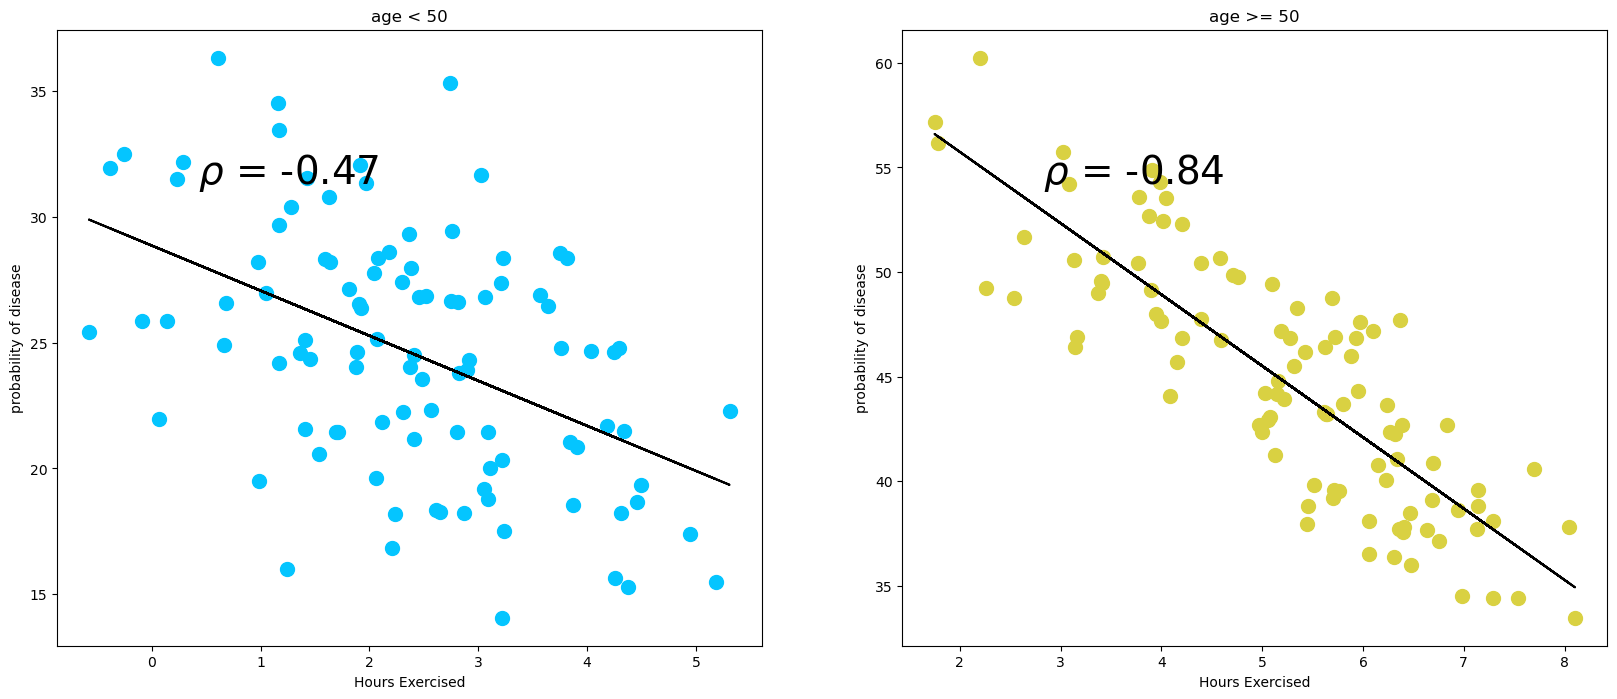

In [40]:
def plot_relationship(data, c, color, ax):
    """Plot a scatter plot with linear fit"""
    x, y = np.array(data[c]), np.array(data['probability of disease'])
    # Linear fit (polynomial of degree 1)
    b, m = polyfit(x, y, 1)
    # Plot scatterplot
    data.plot(x = c, y = 'probability of disease', c = color, 
              style = 'o', legend = None, ax = ax, ms = 10)
    # Plot linear fit
    ax.plot(x, m * x + b, '-', color = 'k');
    if color == '#d9d142':
        plt.title(f'age >= 50')
    elif color == '#04c5ff':
        plt.title(f'age < 50')
    else:
        plt.title(f'Combined')
    corr_coef = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    plt.ylabel('probability of disease'); 
    plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

plt.figure(figsize = (20, 8))
ax = plt.subplot(1, 2, 1)
plot_relationship(under_50, 'Hours Exercised', '#04c5ff', ax)
ax = plt.subplot(1, 2, 2)
plot_relationship(over_50, 'Hours Exercised', '#d9d142', ax)

If we combine these two subgroups together:

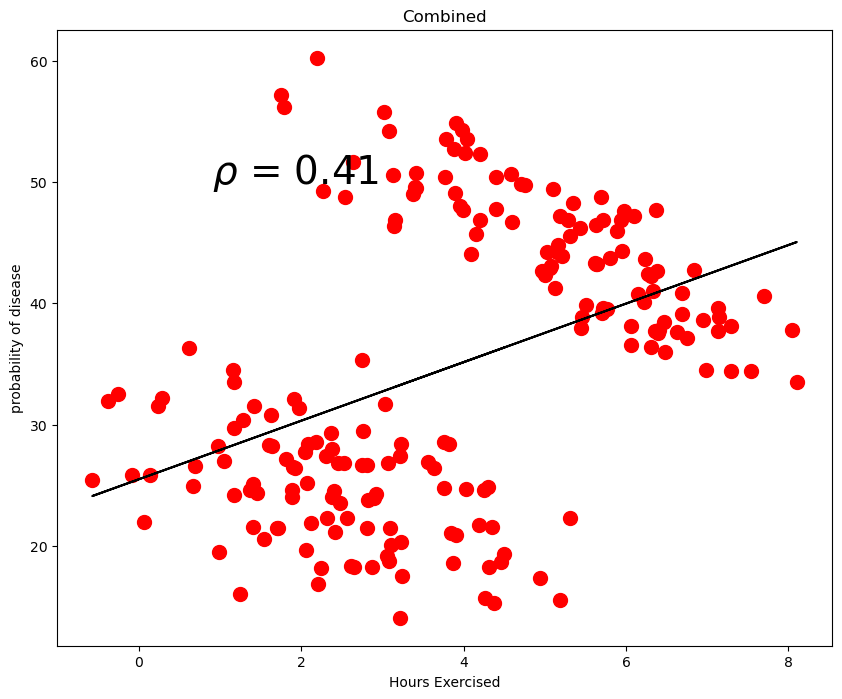

In [42]:
plt.figure(figsize = (10, 8))
combined = pd.concat([under_50, over_50], axis = 0)
ax = plt.subplot(1, 1, 1)
plot_relationship(combined, 'Hours Exercised', 'r', ax)

It turns out that there is ***a third confounding factor*** influencing the relationship between exercise and prob. of disease. Yes, it's the **age** !

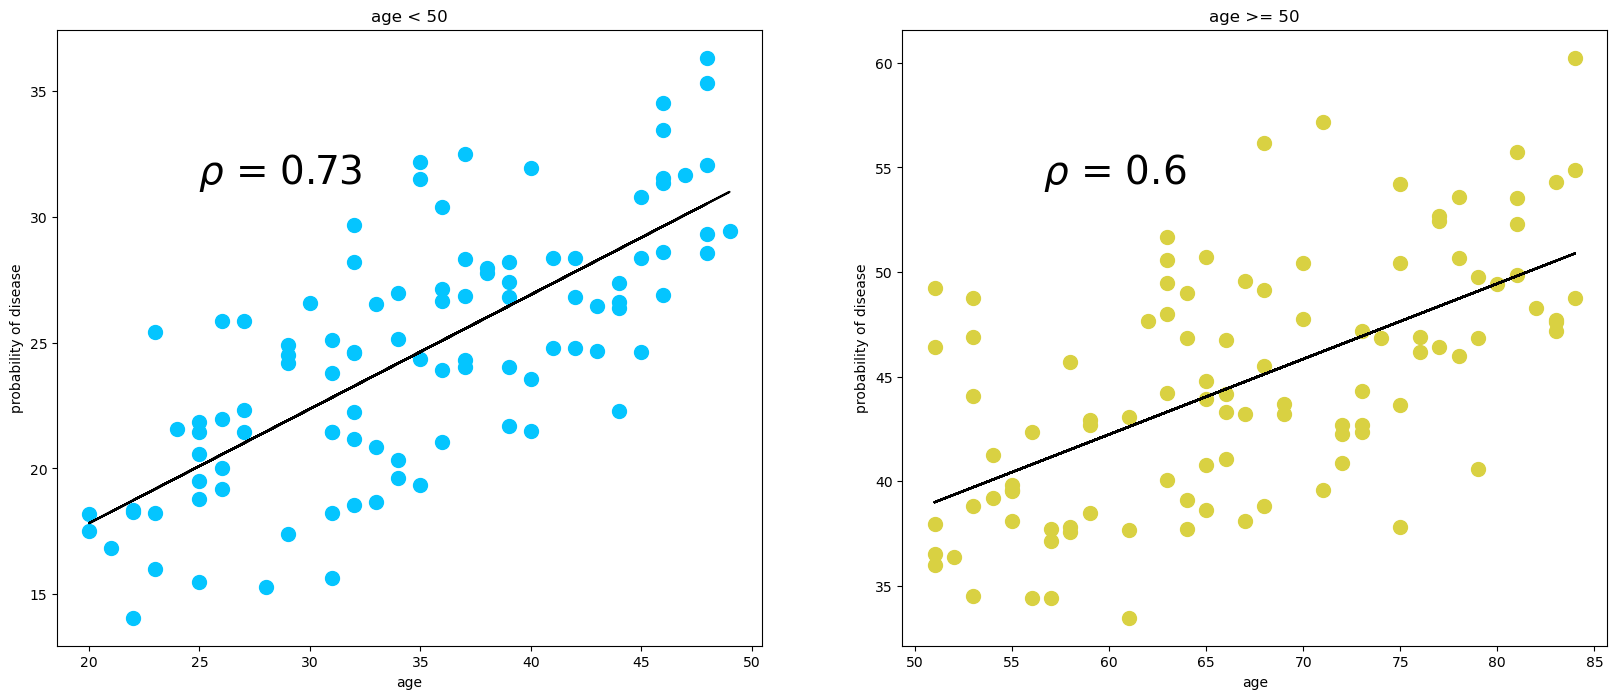

In [46]:
plt.figure(figsize = (20, 8))
ax = plt.subplot(1, 2, 1)
plot_relationship(under_50, 'age', '#04c5ff', ax)
ax = plt.subplot(1, 2, 2)
plot_relationship(over_50, 'age', '#d9d142', ax)

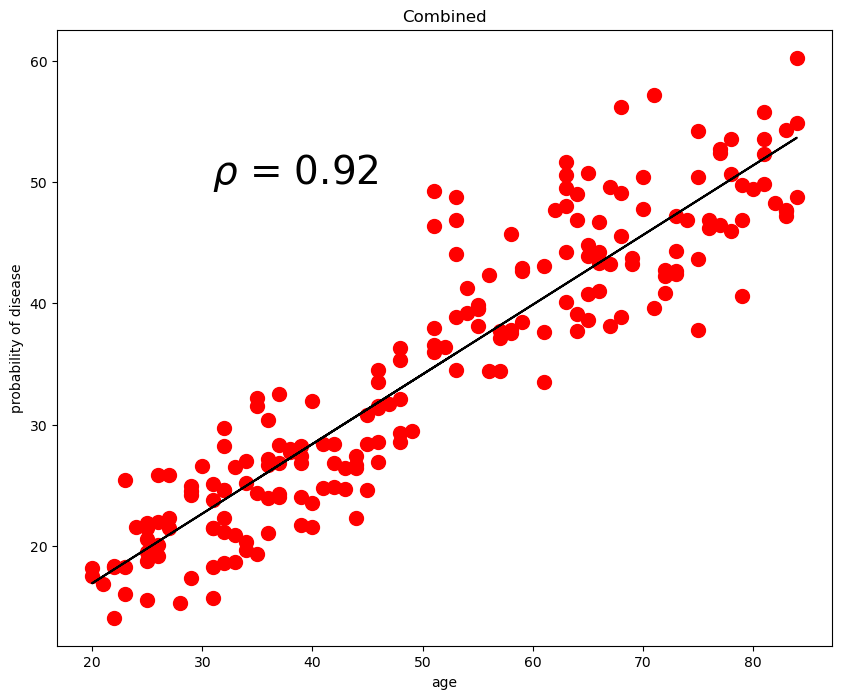

In [47]:
plt.figure(figsize = (10, 8))
ax = plt.subplot(1, 1, 1)
plot_relationship(combined, 'age', 'r', ax)

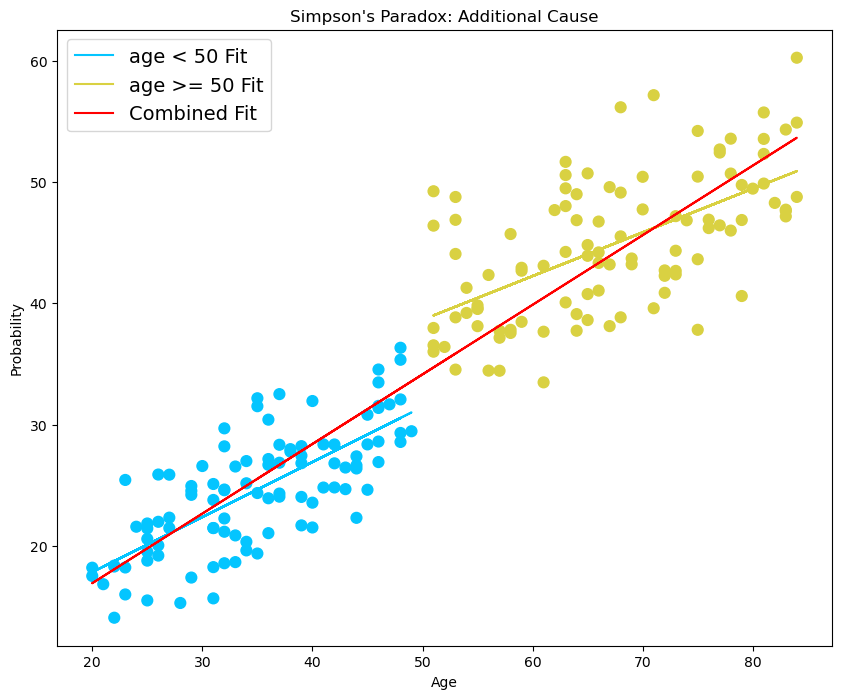

In [54]:
colors = [ '#04c5ff' for _ in range(n_sample)]
colors.extend(['#d9d142' for _ in range(n_sample)])

plt.figure(figsize = (10, 8))

plt.scatter(combined['age'],
            combined['probability of disease'], c = colors, label = None, s = 60);

x_c, y_c = np.array(combined['age']), np.array(combined['probability of disease'])
b_c, m_c = polyfit(x_c, y_c, 1)

x_u, y_u = np.array(under_50['age']), np.array(under_50['probability of disease'])
b_u, m_u = polyfit(x_u, y_u, 1)

x_o, y_o = np.array(over_50['age']), np.array(over_50['probability of disease'])
b_o, m_o = polyfit(over_50['age'], over_50['probability of disease'], 1)

plt.plot(x_u, b_u + m_u * x_u, c =  '#04c5ff', label = 'age < 50 Fit');
plt.plot(x_o, b_o + m_o * x_o, c = '#d9d142', label = 'age >= 50 Fit');
plt.plot(x_c, b_c + m_c * x_c, c = 'r', label = 'Combined Fit');
plt.xlabel('Age');
plt.ylabel('Probability'); plt.title("Simpson's Paradox: Additional Cause");
plt.legend(prop = {'size': 14});

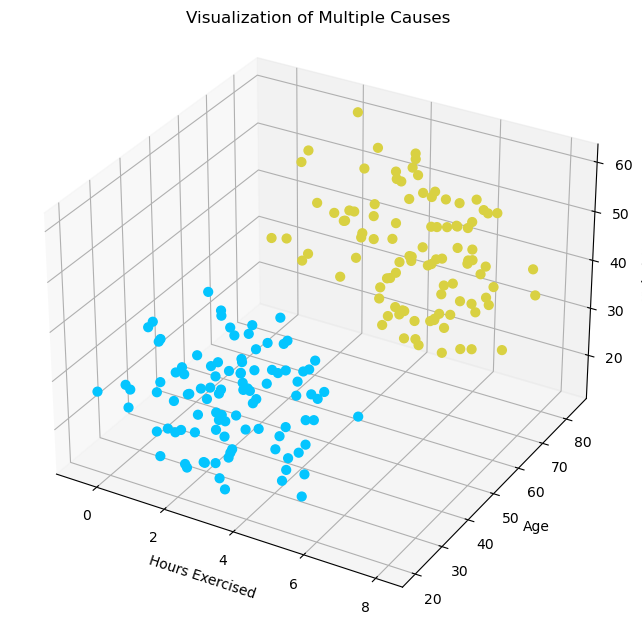

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')


markers = ['.' for _ in range(100)]
markers.extend('o' for _ in range(100))

x_c = np.array(combined['Hours Exercised'])
y_c = np.array(combined['age'])
z_c = np.array(combined['probability of disease'])
ax.scatter(x_c, y_c, z_c, c=colors, s = 40, marker='o', alpha = 1.0)

ax.set_xlabel('Hours Exercised')
ax.set_ylabel('Age')
ax.set_zlabel('probability');
ax.set_title('Visualization of Multiple Causes', y = 1.05);